In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from adaptive_al_v2.utils.data_loader import load_jigsaw

sns.set_theme(style="whitegrid")

## Load Dataset

In [3]:
df_train, df_val, df_test = load_jigsaw()
df = pd.concat([df_train, df_val, df_test])
df.head()


,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"Vankenta here: Well, it seems that there is no...",0,0,0,0,0,0
1,Article needs expansion and consistent citatio...,0,0,0,0,0,0
2,Guess that redlink answers that. Said ~ Did,0,0,0,0,0,0
3,""", 14 December 2011 (UTC)\n\nStrong Support, I...",0,0,0,0,0,0
4,I notice that you have edited Michigan-related...,0,0,0,0,0,0


## Label Distribution

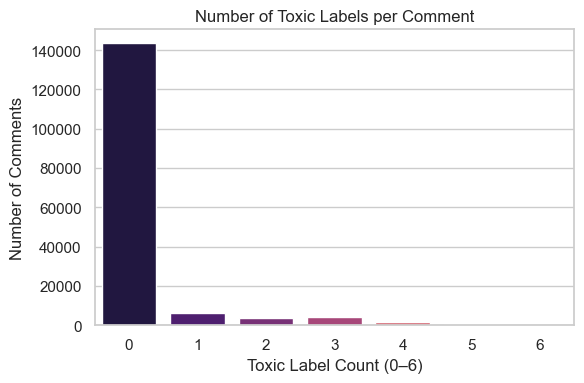

In [5]:
# Define the label columns again for clarity
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Count how many labels each comment has
df["num_labels"] = df[label_cols].sum(axis=1)

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="num_labels", palette="magma")

plt.title("Number of Toxic Labels per Comment")
plt.xlabel("Toxic Label Count (0–6)")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

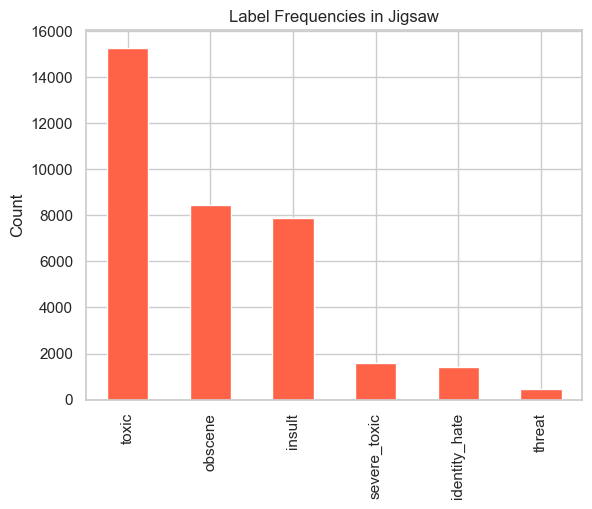

In [6]:
df[label_cols].sum().sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title("Label Frequencies in Jigsaw")
plt.ylabel("Count")
plt.show()


## Text Length Analysis

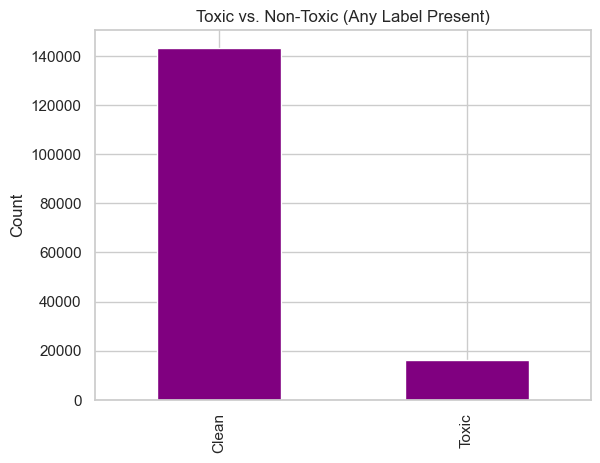

In [10]:
df["is_toxic"] = (df[label_cols].sum(axis=1) > 0).astype(int)
df["is_toxic"].value_counts().plot(kind='bar', color='purple')
plt.title("Toxic vs. Non-Toxic (Any Label Present)")
plt.xticks([0, 1], ["Clean", "Toxic"])
plt.ylabel("Count")
plt.show()


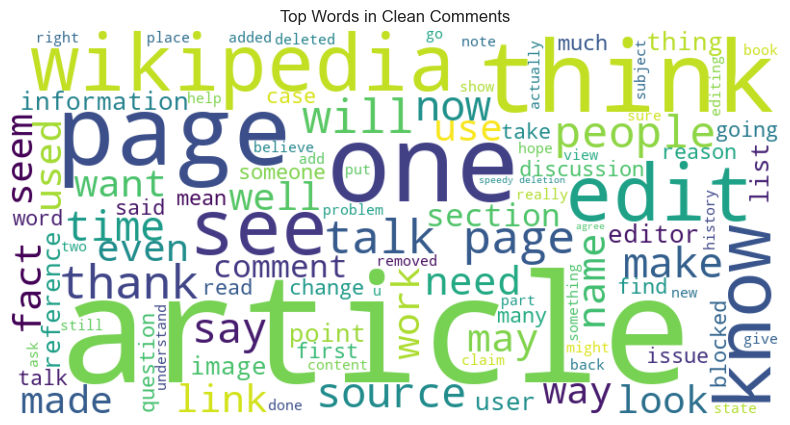

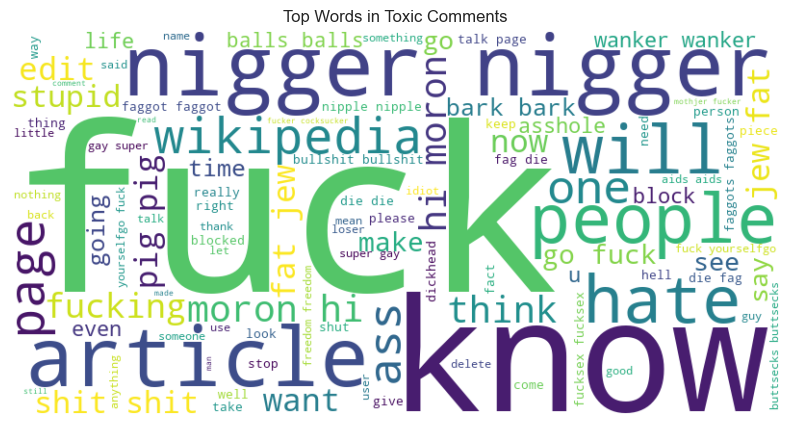

In [12]:
stopwords = set(STOPWORDS)

for label_val, label_name in {0: "Clean", 1: "Toxic"}.items():
    subset = df[df["is_toxic"] == label_val]
    text_blob = " ".join(subset["text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Comments")
    plt.show()
